In [1]:
stop_words_remove = [
 'bà',
 'bài',
 'bán',
 'bản_thân',
 'bắt_đầu',
 'chơi',
 'chắc_chắn',
 'chị',
 'chịu',
 'chọn',
 'cá_nhân',
 'cơ_hội',
 'cảm_thấy',
 'cậu',
 'dài',
 'dành',
 'dễ',
 'em',
 'giá_trị',
 'giữ',
 'gần',
 'gặp',
 'hiện_tại',
 'hoàn_toàn',
 'hỏi',
 'khá',
 'khó',
 'khó_khăn',
 'kể',
 'lâu',
 'lòng',
 'lý_do',
 'lớn',
 'lời',
 'mở',
 'nghe',
 'nghĩ',
 'nguồn',
 'ngồi',
 'nhanh',
 'nhà',
 'nhìn',
 'nhóm',
 'nhất',
 'nhận',
 'nhỏ',
 'nhớ',
 'nhờ',
 'nước',
 'quan_trọng',
 'quan_tâm',
 'quay',
 'quá_trình',
 'sáng',
 'thay_đổi',
 'tháng',
 'thêm',
 'thích',
 'thậm_chí',
 'thật',
 'thời_gian',
 'thời_điểm',
 'thực_hiện',
 'thực_tế',
 'tin',
 'tiếp_tục',
 'trở_thành',
 'tìm',
 'tính',
 'tăng',
 'tạo',
 'tập_trung',
 'tốt',
 'tự',
 'việc',
 'vượt',
 'vấn_đề',
 'xa',
 'xem',
 'xin',
 'xuất_hiện',
 'ăn',
 'điểm',
 'đúng',
 'đạt',
 'đầu_tiên',
 'đặc_biệt',
 'đặt',
 'đủ',
 'chia_sẻ'
 ]

In [2]:
stop_words_add = ['đi',
 'ta',
 '1',
 'the',
 '2',
 'hai',
 'chẳng',
 'câu',
 '3',
 'a',
 'of',
 'đấy',
 'and',
 'đứa',
 'mấy',
 'thành',
 '4',
 'lắm',
 'i',
 '5',
 'đừng',
 'in',
 'có_lẽ',
 'kẻ',
 'kia',
 'you',
 '10',
 'hắn',
 'kiểu',
 '’',
 's',
 'is',
 'bảo',
 'xảy',
 'nỗi',
 'thằng',
 'chỗ',
 '6',
 'it',
 'xong',
 'that',
 'hôm',
 'hôm_nay',
 'coi',
 'hơi',
 'dần',
 '7',
 'là',
 'suốt',
 't',
 'mày',
 'chút',
 'liệu',
 'có',
 'vốn',
 'đem',
 'bọn',
 'và',
 'thay',
 'for',
 'một',
 '8',
 'mãi',
 '\xa0',
 'tui',
 'tao',
 '+']

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_add = stop_words_add + stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import pandas as pd
import random 
import numpy as np
import math
import gensim
# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/Data Analyst/TopCV/Data

/content/drive/MyDrive/Data Analyst/TopCV/Data


## Clean data

In [ ]:
data = pd.read_csv('./topcv.csv')
data.head()

,Title,Company,Address,Description,Year_exp,Sex,Field,Skill,Company_or_Brand
0,Frontend Fresher,CÔNG TY CỔ PHẦN EDSO LABS,"Tầng 2, B16 - 05A, Khu chức năng đô thị Thành ...",\nMô tả công việc\nĐược đào tạo on job\nTham g...,Không yêu cầu,Không yêu cầu,\nNgành nghề\n\nIT phần mềm\n\n,NaN,Company
1,Fresher .Net,CÔNG TY CỔ PHẦN EDSO LABS,"Tầng 2, B16 - 05A, Khu chức năng đô thị Thành ...",\nMô tả công việc\nĐược đào tạo on jobTham gia...,Không yêu cầu,Không yêu cầu,\nNgành nghề\n\nIT Phần cứng / Mạng\n\n\nIT ph...,NaN,Company
2,Nhân Viên Tư Vấn Phần Mềm - Hồ Chí Minh,VĂN PHÒNG ĐẠI DIỆN CÔNG TY CỔ PHẦN PHẦN MỀM CI...,"Lầu 6, Khu C, Tòa nhà WASECO, số 10 Phổ Quang,...",\nMô tả công việc\n- Liên hệ với Khách hàng th...,Dưới 1 năm,Không yêu cầu,\nNgành nghề\n\nKinh doanh / Bán hàng\n\n\nIT ...,NaN,Company
3,Điều Phối Nguồn Lực Giảng Dạy (Mentor Lead),ĐH Trực Tuyến FUNIX,"Tòa nhà FPT, phố Duy Tân, Cầu Giấy, Hà Nội",\nMô tả công việc\n•\tKhai thác điều phối nguồ...,2 năm,Nữ,\nNgành nghề\n\nGiáo dục / Đào tạo\n\n\nHành c...,NaN,Company
4,IT System Administrator,Công ty Cổ phần Tư vấn DataHouse Asia,"Tầng 7, tòa nhà AAC, lô 78-80, đường 30/4, phư...",\nMô tả công việc\n- Make sure our internet ne...,Không yêu cầu,Không yêu cầu,\nNgành nghề\n\nIT phần mềm\n\n\nCông nghệ thô...,\nKỹ năng\n\nIT Helpdesk\n\n\nLinux\n\n\nSyste...,Company


In [ ]:
# Sort data by the length of Skill column
data.sort_values(by='Skill', key=lambda x: x.str.len(), ascending=False, inplace=True)

In [ ]:
#Remove duplicated columns
data.drop_duplicates(subset=['Title', 'Company'], inplace=True)
data.drop_duplicates(subset=['Description'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# Remove part "Quyền lợi được hưởng"
def convert(x):
    if 'Quyền lợi được hưởng' in x:
        idx = x.find('Quyền lợi được hưởng')
        x = x[:idx]
    if 'QUYỀN LỢI ĐƯỢC HƯỞNG' in x:
        idx = x.find('QUYỀN LỢI ĐƯỢC HƯỞNG')
        x = x[:idx]
    return x
    
data['Description'] = data['Description'].apply(lambda x: convert(x))

**Address column**

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
# Create list of unique address
data['Address'] = data['Address'].apply(lambda x: x.replace('-', ',').replace('–', ',').replace('_', ','))
address = data['Address'].unique()

In [ ]:
def convert_address(address):
    print(address)
    location = geolocator.geocode(address, timeout=10000)
    if not location is None:
        return (location.address, location.longitude, location.latitude)
    if ',' not in address:
        return (np.nan, np.nan, np.nan)
    else:
        while ',' in address:
            idx_comma = address.find(',')
            address = address[idx_comma + 1:]
            location = geolocator.geocode(address)
            if not location is None:
                return (location.address, location.longitude, location.latitude)
    return (np.nan, np.nan, np.nan)

In [ ]:
# Convert messy address to be cleaned
full_location = []
for addr in address:
    res = convert_address(addr)
    full_location.append(res)
    print(res)

In [ ]:
# Create a dict to map messy address to clean one
mapping_location = dict(zip(address, full_location))
mapping_location

In [ ]:
with open("./mapping_location.pkl", "rb") as f:
    mapping_location = pickle.load(f)

for location in address:
    if location not in mapping_location:
        print(location)
        mapping_location[location] = convert_address(location)

with open("./mapping_location.pkl", "wb") as f:
    pickle.dump(mapping_location, f)

In [ ]:
with open("./mapping_location.pkl", "rb") as f:
    mapping_location = pickle.load(f)

In [ ]:
# Create more cols
data['Cleaned_address'] = data['Address'].apply(lambda x: mapping_location[x][0])
data['Longitude'] = data['Address'].apply(lambda x: mapping_location[x][1])
data['Latitude'] = data['Address'].apply(lambda x: mapping_location[x][2])

**Clean description**

In [ ]:
# Clean the text
import string
puncs = string.punctuation + '“”–…●•·−'
puncs = puncs.replace('+', '')

def clean_body(post):
    post = post.lower()
    post = post.replace('\n', ' ').replace('mô tả công việc', ' ').replace('yêu cầu ứng viên', ' ').replace('\xa0', ' ').replace('\t', ' ')
    for punc in puncs:
        post = post.replace(punc, ' ')
    return post


In [ ]:
data['Description'] = data['Description'].apply(lambda x: clean_body(x))

# Tokenize

In [ ]:
!pip3 install vncorenlp
!mkdir -p vncorenlp/models/wordsegmenter
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget -q --show-progress https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     |████████████████████████████████| 2.7MB 13.7MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp37-none-any.whl size=2645936 sha256=b57c900e5617fcc3127599d17519efe207960078d8b30935ec02988bce72d7e0
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  49.0MB/s    in 0.5s    
vi-vocab            100%[===================>] 514.20K  --.-KB/s    in 0.04s   
wordsegmenter.rdr   100%[===================>] 125.50K  --.-KB/s    in 0.01s   


In [ ]:
from vncorenlp import VnCoreNLP
tokenizer = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

In [ ]:
# Tokenize description
data['Tokenize'] = data['Description'].apply(lambda x: tokenizer.tokenize(x)[0])

**Skill column**

In [ ]:
def clean_skill_col(x):
    x = x.replace('Kỹ năng', '')
    res = [skill for skill in x.split('\n') if skill != '']
    return res
data['Skill'] = data['Skill'].apply(lambda x: clean_skill_col(x) if not pd.isnull(x) else x)

In [ ]:
all_skills = pd.Series(data["Skill"].dropna().sum()).unique()
all_skills = [skill for skill in all_skills if skill not in ['phần mềm', 'IT', 'it', 'SOFTWARE', 'web', 'AI', 'Game', 'LESS', 'AM', 'BA', 'WEB', 'mobile']]

def fill_skills(x):
    res = []
    for skill in all_skills:
        if skill.lower() in x:
            res.append(skill)
    return res

data['Filled_skills'] = data['Tokenize'].apply(lambda x: fill_skills(x))
data['Skill'] = data['Skill'].apply(lambda x: x if isinstance(x, list) else [])
data['Filled_skills'] = data['Filled_skills'] + data['Skill']
data['Filled_skills'] = data['Filled_skills'].apply(lambda x: list(set(x)))

In [ ]:
data.to_csv('./cleaned_df.csv', index=False)

# Build model LDA

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
!pip install pyLDAvis

In [7]:
# Read file csv
data = pd.read_csv('./cleaned_df.csv')

**Topic modelling based on JD content**

In [ ]:
import ast
from gensim import corpora
import collections
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from wordcloud import WordCloud
import pickle
from gensim.models.ldamodel import LdaModel
import warnings

class LDAmodel(object):
    def __init__(self, tokenize_df, stop_words_add, stop_words_remove):
        self.tokenize_df = tokenize_df
        self.mallet_path = './mallet-2.0.8/bin/mallet'
        self.stop_words_add = stop_words_add
        self.stop_words_remove = stop_words_remove
        self.final_stop_words = None
        self.BoW_corpus = None
        self.dictionary = None
        self.ldamallet = None
        self.name_topics = None

    def clean_docs(self):
        # Because list data convert into string when saving, so we need to convert back to list
        self.tokenize_df['Tokenize'] = self.tokenize_df['Tokenize'].apply(lambda x: ast.literal_eval(x))
    
    def remove_stop_words(self):
        # Create dictionary and Bag of Words
        self.dictionary = corpora.Dictionary(self.tokenize_df['Tokenize'])
        self.BoW_corpus = [self.dictionary.doc2bow(doc) for doc in self.tokenize_df['Tokenize']]
        
        # Filter top 500 words that show up the most
        BoW_dict = collections.defaultdict(int)
        for doc in self.BoW_corpus:
            for id, freq in doc:
                BoW_dict[self.dictionary[id]] += freq

        BoW_dict = pd.Series(BoW_dict).reset_index()
        BoW_dict.columns = ['word', 'count']
        BoW_dict.sort_values(by='count', ascending=False, inplace=True)

        top_tf_words = list(BoW_dict.iloc[:500, :]['word'])

        # List stop word from GitHub
        stopwords_VN = pd.read_csv('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt', delimiter = "\t", header=None)
        stopwords_VN = list(stopwords_VN.iloc[:, 0])

        # Make a final list of stop words
        stop_words = [w for w in stopwords_VN if w in top_tf_words]
        self.final_stop_words = list(set(stop_words + self.stop_words_add) - set(self.stop_words_remove))

        # Filter stop words and extreme words
        self.tokenize_df['Tokenize'] = self.tokenize_df['Tokenize'].apply(lambda x: [w for w in x if w not in self.final_stop_words])

        self.dictionary = corpora.Dictionary(self.tokenize_df['Tokenize'])
        self.dictionary.filter_extremes(no_below=10, no_above=0.3)
        self.BoW_corpus = [self.dictionary.doc2bow(doc) for doc in self.tokenize_df['Tokenize']]

    def train_model(self, num_topics, num_iters, optimize_interval):
        self.ldamallet = gensim.models.wrappers.LdaMallet(self.mallet_path, corpus=self.BoW_corpus, num_topics=num_topics, 
                                                          id2word=self.dictionary, iterations=num_iters, optimize_interval=optimize_interval)
        
    def print_topics(self, num_words):
        topics = [[(term, round(wt, 3)) for term, wt in self.ldamallet.show_topic(n, topn=20)] for n in range(0, self.ldamallet.num_topics)]
        topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term' + str(i) for i in range(1, 21)],
                                index=['Topic '+ str(t) for t in range(1, self.ldamallet.num_topics + 1)]).T
        return topics_df.head(num_words)
    
    def get_coherence_score(self):
        return gensim.models.CoherenceModel(model=self.ldamallet, texts=self.tokenize_df['Tokenize'], dictionary=self.dictionary, coherence='c_v').get_coherence()
    
    
    def save_all(self, path_model, path_BoW, path_dictionary):
        # Save lda model, BoW and dictionary
        self.ldamallet.save(path_model)
        pickle.dump(self.BoW_corpus, open(path_BoW, "wb"))
        self.dictionary.save(path_dictionary)

    def load_all(self, path_model, path_BoW, path_dictionary):
        # Load lda model, BoW and dictionary
        self.ldamallet = gensim.models.wrappers.LdaMallet.load(path_model)
        self.BoW_corpus = pickle.load(open(path_BoW, 'rb'))
        self.dictionary = gensim.corpora.Dictionary.load(path_dictionary)

    def word_cloud(self):
        wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
        plt.rcParams['figure.figsize'] = [20, 15]

        num_topics = len(self.ldamallet.get_topics())
        for i in range(num_topics):
            wc.generate_from_frequencies(dict(self.ldamallet.show_topic(i, topn=20)))
            plt.subplot(5, 4, i+1)
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.title('Topic ' + str(i + 1))
        plt.show()
    
    def word_cloud_topic(self, id_topic):
        wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
        plt.rcParams['figure.figsize'] = [10, 7.5]
        wc.generate_from_frequencies(dict(self.ldamallet.show_topic(id_topic, topn=20)))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title('Topic ' + str(id_topic + 1))
        plt.show()
    
    def stat_topics(self):
        topic_corpus = [sorted(topics, key=lambda x: x[1], reverse=True)[0][0] for topics in self.ldamallet[self.BoW_corpus]]
        #Build a DataFrame
        dominant_topic_col = sorted(list(set(topic_corpus)))
        doc_count_col = [topic_corpus.count(n) for n in dominant_topic_col]
        total_docs_perc_col = [round(num/sum(doc_count_col), 2) * 100 for num in doc_count_col]
        d = {'Dominant Topic': dominant_topic_col, 'Doc Count': doc_count_col, 'Total Docs Perc': total_docs_perc_col}
        
        return pd.DataFrame(data=d)
    
    def create_topics_weight(self):
        return pd.DataFrame.from_records([{v: round(k * 100, 2) for v, k in row} for row in self.ldamallet[self.BoW_corpus]])
    
    def repr_docs(self, id_topic, num_docs):
        topics_weight_df = self.create_topics_weight()
        idx_repr_docs = topics_weight_df.sort_values(by=id_topic, ascending=False).iloc[:, id_topic][:num_docs].index
        return self.tokenize_df[self.tokenize_df.index.isin(idx_repr_docs)]
    
    def optimal_num_topics(self, num_topics_start, num_topics_end, num_iters, optimize_intervals):
        warnings.filterwarnings("ignore", category=DeprecationWarning) 

        for num in range(num_topics_start, num_topics_end + 1):
            self.train_model(num, num_iters, optimize_intervals)
            u_mass = gensim.models.CoherenceModel(model=self.ldamallet, corpus=self.BoW_corpus, dictionary=self.dictionary, coherence='u_mass').get_coherence()
            c_v = gensim.models.CoherenceModel(model=self.ldamallet, texts=self.tokenize_df['Tokenize'], dictionary=self.dictionary, coherence='c_v').get_coherence()
            print('{} topics: u_mass score is {} and c_v score is {}'.format(num, u_mass, c_v))


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
JD_model = LDAmodel(data, stop_words_add, stop_words_remove)

In [ ]:
JD_model.clean_docs()

In [ ]:
JD_model.remove_stop_words()

In [ ]:
JD_model.train_model(12, 5000, 0)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


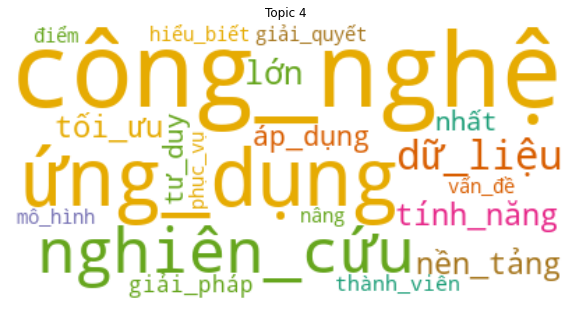

In [ ]:
JD_model.word_cloud_topic(3)

In [ ]:
JD_model.print_topics(10)

In [ ]:
JD_model.get_coherence_score()

0.7744924474145762

In [ ]:
JD_model.repr_docs(3, 10)[['Title', 'Company']]

In [ ]:
import ast
from gensim import corpora
import collections
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from wordcloud import WordCloud
import pickle
from gensim.models.ldamodel import LdaModel
import warnings

class LDAmodel_skill(object):
    def __init__(self, tokenize_df):
        self.tokenize_df = tokenize_df.copy()
        self.mallet_path = './mallet-2.0.8/bin/mallet'
        self.BoW_corpus = None
        self.dictionary = None
        self.ldamallet = None
        self.name_topics = None

    def clean_docs(self):
        # Because list data convert into string when saving, so we need to convert back to list
        self.tokenize_df['Filled_skills'] = self.tokenize_df['Filled_skills'].apply(lambda x: ast.literal_eval(x))
    
    def remove_stop_words(self):
        # Create dictionary and Bag of Words
        self.dictionary = corpora.Dictionary(self.tokenize_df['Filled_skills'])
        self.dictionary.filter_extremes(no_below=15)
        self.BoW_corpus = [self.dictionary.doc2bow(doc) for doc in self.tokenize_df['Filled_skills']]

    def train_model(self, num_topics, num_iters, optimize_interval):
        self.ldamallet = gensim.models.wrappers.LdaMallet(self.mallet_path, corpus=self.BoW_corpus, num_topics=num_topics, 
                                                          id2word=self.dictionary, iterations=num_iters, optimize_interval=optimize_interval)
    
    def print_topics(self, num_words):
        topics = [[(term, round(wt, 3)) for term, wt in self.ldamallet.show_topic(n, topn=20)] for n in range(0, self.ldamallet.num_topics)]
        topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term' + str(i) for i in range(1, 21)],
                                index=['Topic '+ str(t) for t in range(1, self.ldamallet.num_topics + 1)]).T
        return topics_df.head(num_words)
    
    def get_coherence_score(self):
        return gensim.models.CoherenceModel(model=self.ldamallet, texts=self.tokenize_df['Filled_skills'], dictionary=self.dictionary, coherence='c_v').get_coherence()
    
    def save_all(self, path_model, path_BoW, path_dictionary):
        # Save lda model, BoW and dictionary
        self.ldamallet.save(path_model)
        pickle.dump(self.BoW_corpus, open(path_BoW, "wb"))
        self.dictionary.save(path_dictionary)

    def load_all(self, path_model, path_BoW, path_dictionary):
        # Load lda model, BoW and dictionary
        self.ldamallet = gensim.models.wrappers.LdaMallet.load(path_model)
        self.BoW_corpus = pickle.load(open(path_BoW, 'rb'))
        self.dictionary = gensim.corpora.Dictionary.load(path_dictionary)

    def word_cloud(self):
        wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
        plt.rcParams['figure.figsize'] = [20, 15]

        num_topics = len(self.ldamallet.get_topics())
        for i in range(num_topics):
            wc.generate_from_frequencies(dict(self.ldamallet.show_topic(i, topn=20)))
            plt.subplot(5, 4, i+1)
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.title('Topic ' + str(i))
        plt.show()
    
    def word_cloud_topic(self, id_topic):
        wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
        plt.rcParams['figure.figsize'] = [10, 7.5]
        wc.generate_from_frequencies(dict(self.ldamallet.show_topic(id_topic, topn=20)))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title('Topic ' + str(id_topic + 1))
        plt.show()
    
    def stat_topics(self):
        topic_corpus = [sorted(topics, key=lambda x: x[1], reverse=True)[0][0] for topics in self.ldamallet[self.BoW_corpus]]
        #Build a DataFrame
        dominant_topic_col = sorted(list(set(topic_corpus)))
        doc_count_col = [topic_corpus.count(n) for n in dominant_topic_col]
        total_docs_perc_col = [round(num/sum(doc_count_col), 2) * 100 for num in doc_count_col]
        d = {'Dominant Topic': dominant_topic_col, 'Doc Count': doc_count_col, 'Total Docs Perc': total_docs_perc_col}
        
        return pd.DataFrame(data=d)
    
    def create_topics_weight(self):
        return pd.DataFrame.from_records([{v: round(k * 100, 2) for v, k in row} for row in self.ldamallet[self.BoW_corpus]])
    
    def repr_docs(self, id_topic, num_docs):
        topics_weight_df = self.create_topics_weight()
        idx_repr_docs = topics_weight_df.sort_values(by=id_topic, ascending=False).iloc[:, id_topic][:num_docs].index
        return self.tokenize_df[self.tokenize_df.index.isin(idx_repr_docs)]
    
    def optimal_num_topics(self, num_topics_start, num_topics_end, num_iters, optimize_intervals):
        warnings.filterwarnings("ignore", category=DeprecationWarning) 

        for num in range(num_topics_start, num_topics_end + 1):
            self.train_model(num, num_iters, optimize_intervals)
            u_mass = gensim.models.CoherenceModel(model=self.ldamallet, corpus=self.BoW_corpus, dictionary=self.dictionary, coherence='u_mass').get_coherence()
            c_v = gensim.models.CoherenceModel(model=self.ldamallet, texts=self.tokenize_df['Filled_skills'], dictionary=self.dictionary, coherence='c_v').get_coherence()
            print('{} topics: u_mass score is {} and c_v score is {}'.format(num, u_mass, c_v))
            

    


In [ ]:
skill_model = LDAmodel_skill(data)

In [ ]:
skill_model.clean_docs()

In [ ]:
skill_model.remove_stop_words()

In [ ]:
skill_model.train_model(num_topics=12, num_iters=5000, optimize_interval=100)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


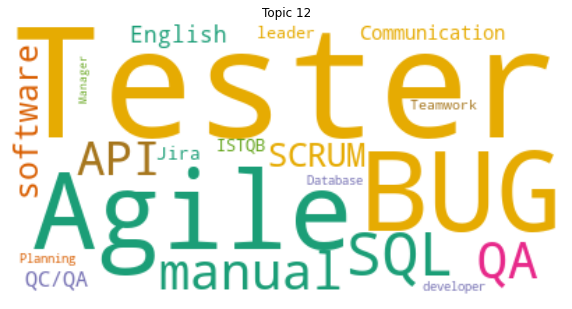

In [ ]:
skill_model.word_cloud_topic(11)

In [ ]:
skill_model.print_topics(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
Term1,server,English,React,Spring,Javascript,Marketing,Android,PHP,Marketing,Python,SQL,Tester
Term2,Linux,Communication,react,Java,CSS,Sales,iOS,HTML,Photoshop,MySQL,server,BUG
Term3,CCNA,software,Javascript,MySQL,HTML,Excel,UI,CSS,Illustrator,NodeJS,.NET,Agile
Term4,LAN,Manager,ReactJS,SQL,UI,Telesales,Java,Javascript,SEO,AWS,ASP,SQL
Term5,Python,Marketing,API,Oracle,HTML5,Word,Swift,MySQL,UI,Docker,MVC,manual
Term6,SQL,Excel,CSS,Hibernate,ReactJS,ERP,API,Laravel,UX,API,Javascript,QA
Term7,MCSA,Sales,Redux,Javascript,UX,CRM,OOP,JQuery,digital,Cloud,CSS,API
Term8,WAN,Word,HTML,server,CSS3,leader,UX,WordPress,Designer,Linux,C#,SCRUM
Term9,Cloud,Agile,Android,OOP,VueJS,Teamwork,Git,OOP,Analytics,Java,API,software
Term10,Database,Teamwork,Git,MVC,API,Manager,Kotlin,MVC,Figma,CI,HTML,English


In [ ]:
skill_model.get_coherence_score()

0.615521918018182

In [ ]:
skill_model.repr_docs(9, 10)[['Title', 'Company']]

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


,Title,Company
341,Backend Developer,Nichietsu
371,Nodejs Developer,Boost Commerce
614,Middle Devops Engineer (Azure/ Aws),TPS Software
930,"Senior Devops Engineer (Aws, Java)",Công ty TNHH MTV Propzy Việt Nam
1168,Fullstack Developer (Nodejs/PHP/Ruby On Rails),CÔNG TY CỔ PHẦN CÔNG NGHỆ SOTATEK
1357,Web Developer (PHP/ Python/ Ruby),Công ty TNHH Tư Vấn & Phát Triển Phần Mềm LARION
1618,Junior Full Stack Developer (Java/Nodejs/React...,Công ty Cổ phần Aptech
2394,Front End Developer (Nodejs/Reactjs/Vuejs),Công ty Cổ phần Aptech
3235,Senior Backend Engineer (Nodejs),Công Ty TNHH Savyu Việt Nam
3904,Devops Engineer,Công ty TNHH CMC GLOBAL
